<a href="https://colab.research.google.com/github/vijaygwu/SEAS8525/blob/main/Class_2_CL_CustomeCLFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This code demonstrates the process of training a contrastive learning model on the CIFAR-10 dataset using a pre-trained ResNet50 as the base network. The learned representations are then visualized using t-SNE to assess the quality of the embeddings and the separation of different classes in the embedding space.



1. Importing Libraries:
   - The code imports necessary libraries such as TensorFlow, Keras, NumPy, Matplotlib, and scikit-learn.

2. Preprocessing Data:
   - The CIFAR-10 dataset is loaded using `keras.datasets.cifar10.load_data()`.
   - The `preprocess_data` function normalizes the pixel values to the range [0, 1].

3. Data Augmentation:
   - A data augmentation pipeline is defined using `keras.Sequential()` to apply random flips, rotations, and zooms to the input images.

4. Creating the Base Model:
   - The `create_base_model` function defines a base model using the ResNet50 architecture with pre-trained ImageNet weights.
   - The top layer of the base model is removed, and global average pooling and a dense layer with 128 units are added.

5. Creating Pairs:
   - The `make_pairs` function creates positive and negative pairs of images for contrastive learning.
   - Positive pairs consist of images from the same class, while negative pairs consist of images from different classes.

6. Contrastive Loss Function:
   - The `contrastive_loss` function defines the contrastive loss used for training the model.
   - It encourages the embeddings of positive pairs to be close together and the embeddings of negative pairs to be far apart.

7. Building the Contrastive Learning Model:
   - The model takes two input images and processes them using the base network.
   - The distance between the embeddings of the two images is computed using the Euclidean distance.
   - The model is compiled with the contrastive loss function and Adam optimizer.

8. Training the Model:
   - The model is trained using the generated pairs of images and their corresponding labels.
   - The training is performed for 10 epochs with a batch size of 64.

9. Extracting Representations:
   - After training, the base network is used to extract representations (embeddings) for the test images.

10. t-SNE Visualization:
    - The t-SNE algorithm is used to reduce the dimensionality of the learned representations to 2D.
    - The t-SNE results are plotted using Matplotlib, with each point colored according to its true class label.



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 24ms/step - accuracy: 0.5066 - loss: 0.2514 - val_accuracy: 0.5074 - val_loss: 0.2504
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5015 - loss: 0.2501 - val_accuracy: 0.5000 - val_loss: 0.2500
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4857 - loss: 0.2490 - val_accuracy: 0.4146 - val_loss: 0.2413
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4275 - loss: 0.2426 - val_accuracy: 0.4013 - val_loss: 0.2370
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4163 - loss: 0.2398 - val_accuracy: 0.4049 - val_loss: 0.2362
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4102 - loss: 0.2383 - val_accuracy: 0.4011 - val_loss: 0.2347
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4095 - loss: 0.2374 - val_accurac

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


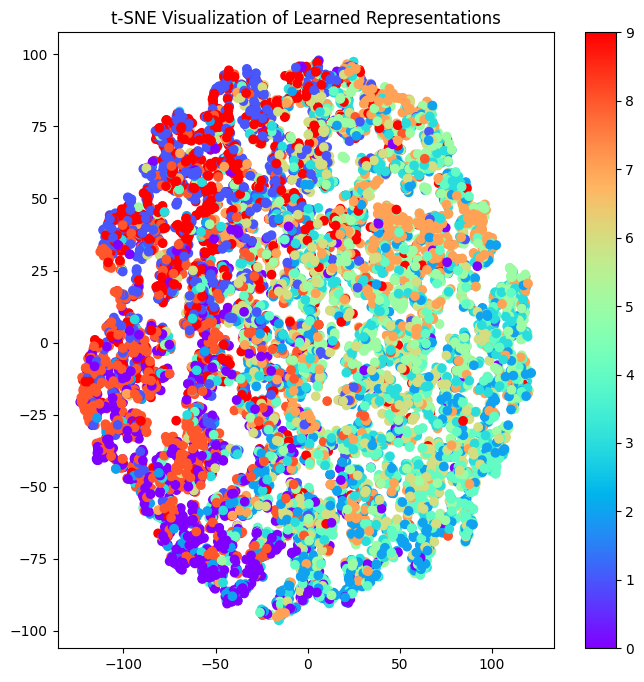

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def preprocess_data(x, y):
    x = x.astype("float32") / 255.0
    return x, y

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

def create_base_model():
    base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False
    inputs = keras.Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(128, activation=None)(x)
    return keras.Model(inputs, outputs)

def make_pairs(images, labels):
    pair_images = []
    pair_labels = []
    labels = np.squeeze(labels)
    num_classes = np.max(labels) + 1
    idx = [np.where(labels == i)[0] for i in range(0, num_classes)]

    for idxA in range(len(images)):
        current_image = images[idxA]
        label = labels[idxA]
        idxB = np.random.choice(idx[label])
        pos_image = images[idxB]
        pair_images.append([current_image, pos_image])
        pair_labels.append([1])
        neg_idx = np.where(labels != label)[0]
        neg_image = images[np.random.choice(neg_idx)]
        pair_images.append([current_image, neg_image])
        pair_labels.append([0])

    return np.array(pair_images), np.array(pair_labels)

pair_train, label_train = make_pairs(x_train, y_train.flatten())
pair_test, label_test = make_pairs(x_test, y_test.flatten())

base_network = create_base_model()

input_a = layers.Input(shape=(32, 32, 3))
input_b = layers.Input(shape=(32, 32, 3))

processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Adjusted contrastive loss function
def contrastive_loss(y_true, y_pred):
    margin = 1
    y_true = tf.cast(y_true, tf.float32)  # Ensure y_true is float32 to match y_pred
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)

distance = layers.Lambda(lambda embeddings: tf.norm(embeddings[0] - embeddings[1], axis=1, keepdims=True))([processed_a, processed_b])
outputs = layers.Dense(1, activation="sigmoid")(distance)
model = keras.Model(inputs=[input_a, input_b], outputs=outputs)

model.compile(loss=contrastive_loss, optimizer="adam", metrics=["accuracy"])

history = model.fit([pair_train[:, 0], pair_train[:, 1]], label_train[:],
                    validation_data=([pair_test[:, 0], pair_test[:, 1]], label_test[:]),
                    batch_size=64, epochs=10)

# Extract representations
representations = base_network.predict(x_test)

# t-SNE visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)
tsne_results = tsne.fit_transform(representations)

plt.figure(figsize=(8, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_test.flatten(), cmap='rainbow')
plt.title('t-SNE Visualization of Learned Representations')
plt.colorbar()
plt.show()
